In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [5]:
# Assuming 'df' is your DataFrame
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


# **Plot the graph:**

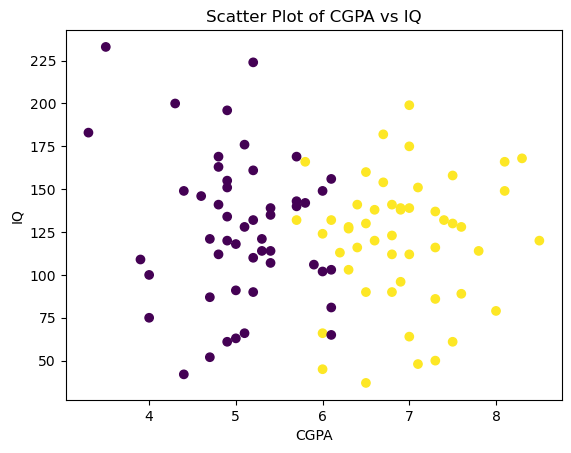

In [9]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of CGPA vs IQ')
plt.show()

# Seperate Feature and target veriable

In [10]:
# seperate dependent and independent veriable
x = df.iloc[:,:2]
y = df.iloc[:,-1]

# Perform train-test split

In [12]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

# Scale ta data

In [13]:
# Scale the values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.transform(x_test)

# Model training

In [15]:
#model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scale,y_train)

LogisticRegression()

# Model prediction

In [16]:
y_pred = model.predict(x_test_scale)

# Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

# plotting the decision boundary

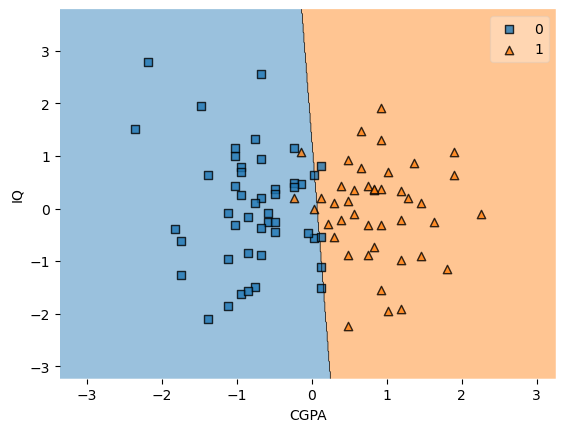

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train_scale,y_train.values,clf=model)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [23]:
import pickle

In [24]:
pickle.dump(model,open("model.pkl","wb"))